This notebook serves as a way to generate the plots necessary for analysis of OTU data. First, we use a standard dataframe analysis package known as "pandas".

In [1]:
import pandas as pd

Excel is not a preferred format, so convert to csv and then read in.

In [2]:
feature = pd.read_csv('feature-table.csv')

In [3]:
taxonomy = pd.read_csv('taxonomy.tsv', sep='\t')

In [4]:
feature

,#OTU ID,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,...,PA3,PD7,PF,PW,pla_w2,PA6,PD5,GA1,GControl,PControl
0,106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,...,0.0,4257.0,55.0,41.0,144.0,16653.0,6.0,2.0,0.0,0.0
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,...,4.0,8.0,2.0,9.0,0.0,0.0,0.0,1.0,64.0,57.0
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,...,0.0,0.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [5]:
taxonomy

,Feature ID,Taxon,Confidence
0,106ecf8b1971449001359790a679cf96b5aed7ce,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.715243
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,k__Bacteria,0.948485
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,k__Bacteria; p__OD1,0.700568
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999997
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.751369
...,...,...,...
6763,f92c8451d4a053da6e073490156b0eee55e1d068,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...,0.999996
6764,fb53df60284bafa331ec434699c9effe10bcef40,k__Bacteria; p__TM7,0.952001
6765,fc8a8fec9661069dd9d534b858254d32e394407c,k__Bacteria; p__OD1; c__; o__; f__; g__; s__,0.804494
6766,fd0bcf1eddb8fde7a0e15da5d0071c71cbba2e9a,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.997396


In [6]:
df = feature.set_index('#OTU ID').join(taxonomy.set_index('Feature ID'))

In [7]:
df

,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,GD7,...,PF,PW,pla_w2,PA6,PD5,GA1,GControl,PControl,Taxon,Confidence
#OTU ID,,,,,,,,,,,,,,,,,,,,,
106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,641.0,...,55.0,41.0,144.0,16653.0,6.0,2.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.715243
ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria,0.948485
03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__OD1,0.700568
7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,601.0,...,2.0,9.0,0.0,0.0,0.0,1.0,64.0,57.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999997
a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,416.0,...,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.751369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.999355
d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__[Thermi]; c__Deinococci; o__De...,0.999985
8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__OD1; c__; o__; f__; g__; s__,0.925608


Everything looks straightforward except for taxonomy. What is going on there? Let's look at the first entry to see what's going on.

In [9]:
df.columns

Index(['GA2', 'GA5', 'GA6', 'GA8', 'GD1', 'GD2', 'GD3', 'GD5', 'GD6', 'GD7',
       'GD8', 'GF', 'PA2', 'PA5', 'PD1', 'PD3', 'PD6', 'PD8', 'grd_w2',
       'grd_w1', 'pla_w1', 'GD4', 'PA8', 'PD2', 'GA4', 'GA7', 'PA1', 'PA7',
       'GA3', 'GW', 'PA4', 'PD4', 'PA3', 'PD7', 'PF', 'PW', 'pla_w2', 'PA6',
       'PD5', 'GA1', 'GControl', 'PControl', 'Taxon', 'Confidence'],
      dtype='object')

In [10]:
print(df['Taxon'][0])

k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Vibrionales; f__Pseudoalteromonadaceae; g__Vibrio; s__harveyi


Oh! We have all the taxonomic classifications squashed into one cell. Well, let's separate them out, shall we?

In [11]:
def add_taxonomy(df):
    df["Kingdom"] = None
    df["Phylum"] = None
    df["Class"] = None
    df["Order"] = None
    df["Family"] = None
    df["Genus"] = None
    df["Species"] = None
    for ind,instance in df.iterrows():
        taxo = instance['Taxon']
        array_of_taxo = taxo.split(';')
        for thing in array_of_taxo:
            divide = thing.split('__')
            if divide[0].strip() == 'k':
                df.at[ind,'Kingdom'] = str(divide[1])
            if divide[0].strip() == 'p':
                df.at[ind,'Phylum'] = str(divide[1])
            if divide[0].strip() == 'c':
                df.at[ind,'Class'] = str(divide[1])
            if divide[0].strip() == 'o':
                df.at[ind,'Order'] = str(divide[1])
            if divide[0].strip() == 'f':
                df.at[ind,'Family'] = str(divide[1])
            if divide[0].strip() == 'g':
                df.at[ind,'Genus'] = str(divide[1])
            if divide[0].strip() == 's':
                df.at[ind,'Species'] = str(divide[1])
    return df
        

In [12]:
df = add_taxonomy(df)

Now, let's re-examine the dataframe with everything separated out to see if it makes more sense.

In [13]:
df

,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,GD7,...,PControl,Taxon,Confidence,Kingdom,Phylum,Class,Order,Family,Genus,Species
#OTU ID,,,,,,,,,,,,,,,,,,,,,
106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,641.0,...,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.715243,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Pseudoalteromonadaceae,Vibrio,harveyi
ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,k__Bacteria,0.948485,Bacteria,None,None,None,None,None,None
03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,k__Bacteria; p__OD1,0.700568,Bacteria,OD1,None,None,None,None,None
7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,601.0,...,57.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999997,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,None,None
a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,416.0,...,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.751369,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.999355,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Hyphomonadaceae,None,None
d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,k__Bacteria; p__[Thermi]; c__Deinococci; o__De...,0.999985,Bacteria,[Thermi],Deinococci,Deinococcales,Deinococcaceae,Deinococcus,
8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,k__Bacteria; p__OD1; c__; o__; f__; g__; s__,0.925608,Bacteria,OD1,,,,,


In [86]:
aerobic = ['GA1','GA2','GA5','GA6','GD1','GD2','GD5','GD6','PA1','PA2','PA5','PA6','PD1','PD2','PD5','PD6']
anaerobic = ['GA3','GA4','GA7','GA8','GD3','GD4','GD7','GD8','PA3','PA4','PA7','PA8','PD3','PD4','PD7','PD8']
cool = ['GA1','GA3','GA5','GA7','GD1','GD3','GD5','GD7','PA1','PA3','PA5','PA7','PD1','PD3','PD5','PD7']
warm = ['GA2','GA4','GA6','GA8','GD2','GD4','GD6','GD8','PA2','PA4','PA6','PA8','PD2','PD4','PD6','PD8']
tsa = ['GA1','GA2','GA3','GA4','GD1','GD2','GD3','GD4','PA1','PA2','PA3','PA4','PD1','PD2','PD3','PD4']
ma = ['GA5','GA6','GA7','GA8','GD5','GD6','GD7','GD8','PA5','PA6','PA7','PA8','PD5','PD6','PD7','PD8']
aerosols = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8']
aerosol_control = ['GW', 'PW', 'grd_w2', 'pla_w2']
dispersed = ['GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
dispersed_control = ['GW', 'PW', 'grd_w2', 'pla_w2','GF','PF']
grand = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8']
plank = ['PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
control_water_main = ['GW','PW']
control_foam_main = ['GF','PF']
grandctr = ['grd_w1','grd_w2','GW','GControl']
plankctr = ['pla_w1','pla_w2','PW','PControl']
during = ['grd_w2','pla_w2','GW','PW','GF','PF']
surface_water = ['grd_w1','pla_w1','grd_w2','pla_w2','GW','PW','GControl','PControl']
postcontrol = ['GControl','PControl']
aeratoroff = ['grd_w1','pla_w1','GControl','PControl']
all_controls = ['grd_w1','pla_w1','grd_w2','pla_w2','GW','PW','GControl','PControl','GF','PF']
Grand_Aerosols_Controls = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','GW','grd_w2']
Plank_Aerosols_Controls = ['PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8','PW','pla_w2']
Grand_Foams_Controls = ['GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','GW', 'grd_w2', 'GF']
Plank_Foams_Controls = ['PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8','PW', 'pla_w2', 'PF'] 

In [16]:
ncol = 52-11
columns = df.columns
labels = columns[1:ncol+1]
print(labels)

Index(['GA5', 'GA6', 'GA8', 'GD1', 'GD2', 'GD3', 'GD5', 'GD6', 'GD7', 'GD8',
       'GF', 'PA2', 'PA5', 'PD1', 'PD3', 'PD6', 'PD8', 'grd_w2', 'grd_w1',
       'pla_w1', 'GD4', 'PA8', 'PD2', 'GA4', 'GA7', 'PA1', 'PA7', 'GA3', 'GW',
       'PA4', 'PD4', 'PA3', 'PD7', 'PF', 'PW', 'pla_w2', 'PA6', 'PD5', 'GA1',
       'GControl', 'PControl'],
      dtype='object')


Great! One thing we might want to do is look at the most common classifications. We'll do that by sorting.

In [17]:
df.sort_values(list(labels), ascending=[False]*ncol)

,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,GD7,...,PControl,Taxon,Confidence,Kingdom,Phylum,Class,Order,Family,Genus,Species
#OTU ID,,,,,,,,,,,,,,,,,,,,,
106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,641.0,...,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.715243,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Pseudoalteromonadaceae,Vibrio,harveyi
0c520e7dbb2ba95f18889abfacc20a81474c98ba,0.0,9046.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,4.0,...,23.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.923375,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
1072c054780012312322274d4f795e8ff82ed2b9,0.0,1702.0,1832.0,0.0,10.0,1.0,26.0,2774.0,500.0,485.0,...,7.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.751441,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Pseudoalteromonadaceae,Pseudoalteromonas,porphyrae
35f27cbf3fe3de03785df6bf743c2ff61e3e355e,1436.0,1471.0,1349.0,0.0,2100.0,1851.0,574.0,3052.0,3954.0,165.0,...,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.715094,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Pseudoalteromonadaceae,None,None
982a04e769021b314aa19b66164613bda2d833aa,0.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.925629,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582f26e26dea7eef8adc1887c4d2ad992eacab24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,k__Bacteria; p__Proteobacteria; c__Betaproteob...,0.997994,Bacteria,Proteobacteria,Betaproteobacteria,Ellin6067,,,
ba545ac7a789a3998196b2ff20722be07d372889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,k__Bacteria; p__Bacteroidetes,0.999997,Bacteria,Bacteroidetes,None,None,None,None,None
9623c8058ce1926a6a7ba3a65b0d88dc021e171c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.924794,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Thermomonas,


And what if we wanted to know all the Phylum that have been identified?

In [18]:
print(df['Phylum'].unique())

['Proteobacteria' None 'OD1' 'Firmicutes' 'Bacteroidetes' 'Actinobacteria'
 '' 'Cyanobacteria' 'Tenericutes' 'Spirochaetes' 'GN02' 'Fusobacteria'
 'Acidobacteria' 'Verrucomicrobia' 'H-178' 'TM7' 'WPS-2' 'Thermotogae'
 '[Parvarchaeota]' 'WS3' 'WWE1' 'Fibrobacteres' 'Elusimicrobia'
 'Synergistetes' 'SR1' 'Nitrospirae' 'Lentisphaerae' 'Chlorobi' 'BRC1'
 'TM6' 'Planctomycetes' 'Caldiserica' 'Chloroflexi' 'WS6' 'ZB3' 'NKB19'
 'OP9' 'Deferribacteres' 'Gemmatimonadetes' 'OP1' 'SAR406' 'SBR1093'
 'Chlamydiae' 'KSB3' 'OP8' 'Kazan-3B-28' 'Crenarchaeota' 'OP3'
 'Euryarchaeota' '[Thermi]' 'WS5' 'GN04' 'Hyd24-12' 'LCP-89']


You can do some data exploration, if you'd like. How many OTUs are not classified as bacteria?

In [19]:
sum(df['PD8'][df['Kingdom'] != 'Bacteria'])

0.0

And how many are classified as bacteria?

In [20]:
sum(df['PD8'][df['Kingdom'] == 'Bacteria'])

37768.0

Let's do some visualizations. Here are a few standard packages and one that you may have to download via pip: distinctipy. This gives high-contrast colors

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from distinctipy import distinctipy

Let's recreate the distance matrix from the above analysis.

In [22]:
from skbio.diversity import beta_diversity

#ncol = 18
columns = df.columns
labels = columns[1:ncol+1]
data = df[labels]
data_T = data.T
ids = list(labels)
bc_dm = beta_diversity("braycurtis",data_T, ids)

Now we would like to create some data products that can be read in by our tree-generating code ETE3 (which you will need to install as a separate environment for conda)

In [23]:
def create_bio_cluster_matrix(bc_dm,ncol):
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return_list = []
    for ind in range(0,ncol):
        array = bc_dm[ind]
        array_trunc = array[0:ind]
        return_list.append(array_trunc)
    return np.array(return_list)

def create_bio_cluster_conden(bc_dm,ncol):
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return_list = np.array([])
    for ind in range(0,ncol):
        array = bc_dm[ind]
        array_trunc = array[0:ind]
        return_list = np.append(return_list,array_trunc.flatten())
        return_list = np.array(return_list)
        return_list = return_list.flatten()
    return return_list

Time to generate some UPGMA trees. To do this, we will use the average function in the cluster package of scipy along with the distance matrix we generated above. Then we will generate a tree using the skbio package which needs to be saved in the external file format ".ph". This file can then be read into ete3 for visualization. We will color code each child differently to get a better sense of the clustering.

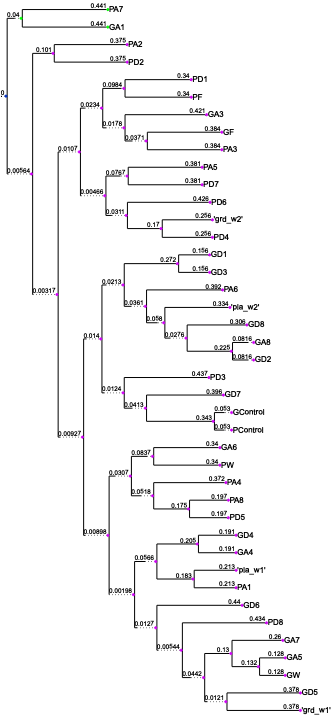

In [24]:
import ete3
from skbio import TreeNode
from scipy.cluster.hierarchy import average
from colormap import rgb2hex
dm = create_bio_cluster_conden(bc_dm,ncol)
lm = average(dm)
upgma_tree = TreeNode.from_linkage_matrix(lm, ids)
upgma_tree_fp = 'new.upgma.ph'
upgma_tree.write(upgma_tree_fp)
ts = ete3.TreeStyle()
ts.scale =  900
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = False
ts.branch_vertical_margin = 10
ts.show_scale = False
ts.scale =  240 # 120 pixels per branch length unit
t=ete3.Tree(upgma_tree_fp, format=1)

children = t.children
colors = distinctipy.get_colors(len(children))
for ind,child in enumerate(children):
    for n in child.traverse():
        nstyle = ete3.NodeStyle()
        thruple = colors[ind]
        color = rgb2hex(int(255*thruple[0]),int(255*thruple[1]),int(255*thruple[2]))
        nstyle["fgcolor"] = color
        n.set_style(nstyle)

t.render("%%inline", units="in",h=8, tree_style=ts)


In [92]:
from skbio.diversity import beta_diversity
import ete3
from skbio import TreeNode
from scipy.cluster.hierarchy import average
from colormap import rgb2hex

def create_cluster_map(df,colnames,title):
    data = df[colnames]
    data_T = data.T
    bc_dm = beta_diversity("braycurtis",data_T, colnames)
    ncol = len(colnames)
    dm = create_bio_cluster_conden(bc_dm,ncol)
    lm = average(dm)
    upgma_tree = TreeNode.from_linkage_matrix(lm, colnames)
    upgma_tree_fp = 'new.upgma.ph'
    upgma_tree.write(upgma_tree_fp)
    ts = ete3.TreeStyle()
    ts.scale =  900
    ts.show_leaf_name = True
    ts.show_branch_length = True
    ts.show_branch_support = False
    ts.branch_vertical_margin = 10
    ts.show_scale = False
    ts.title.add_face(ete3.TextFace(title, fsize=16), column=0)
    ts.scale =  240 # 120 pixels per branch length unit
    t=ete3.Tree(upgma_tree_fp, format=1)
    children = t.children
    ncolor = 0
    for ind,child in enumerate(children):
        ncolor += 1
        grandchildren = child.children
        for ind2,grandchild in enumerate(grandchildren):
            ncolor += 1
    colors = distinctipy.get_colors(ncolor)
    running = 0
    for ind,child in enumerate(children):
        for n in child.traverse():
            nstyle = ete3.NodeStyle()
            thruple = colors[running]
            color = rgb2hex(int(255*thruple[0]),int(255*thruple[1]),int(255*thruple[2]))
            nstyle["fgcolor"] = color
            n.set_style(nstyle)
        running += 1
        grandchildren = child.children
        for ind2,grandchild in enumerate(grandchildren):
            if len(grandchild.children) > 1:
                for n in grandchild.traverse():
                    nstyle = ete3.NodeStyle()
                    thruple = colors[running]
                    color = rgb2hex(int(255*thruple[0]),int(255*thruple[1]),int(255*thruple[2]))
                    nstyle["fgcolor"] = color
                    n.set_style(nstyle)
        running += 1
    return t.render("%%inline", units="in",h=8, tree_style=ts)
    

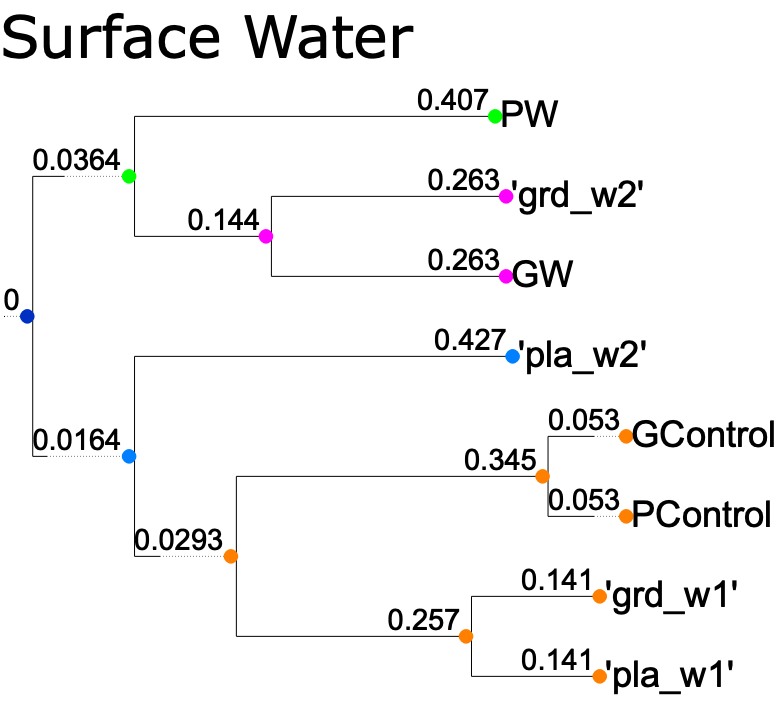

In [94]:
create_cluster_map(df,surface_water,'Surface Water')

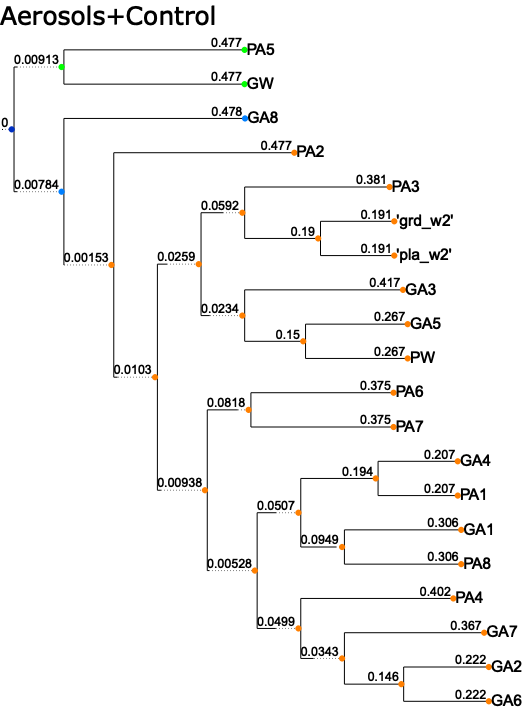

In [95]:
create_cluster_map(df,aerosols+aerosol_control,'Aerosols+Control')

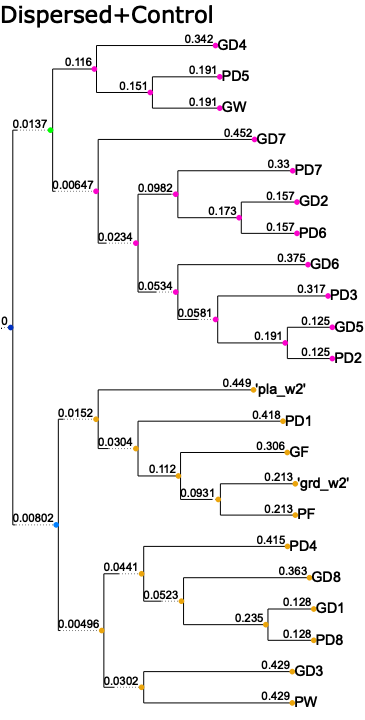

In [96]:
create_cluster_map(df,dispersed+dispersed_control,'Dispersed+Control')

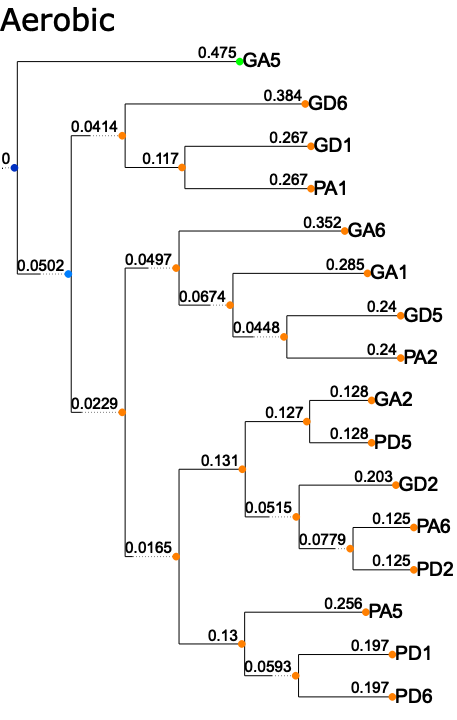

In [97]:
create_cluster_map(df,aerobic,'Aerobic')

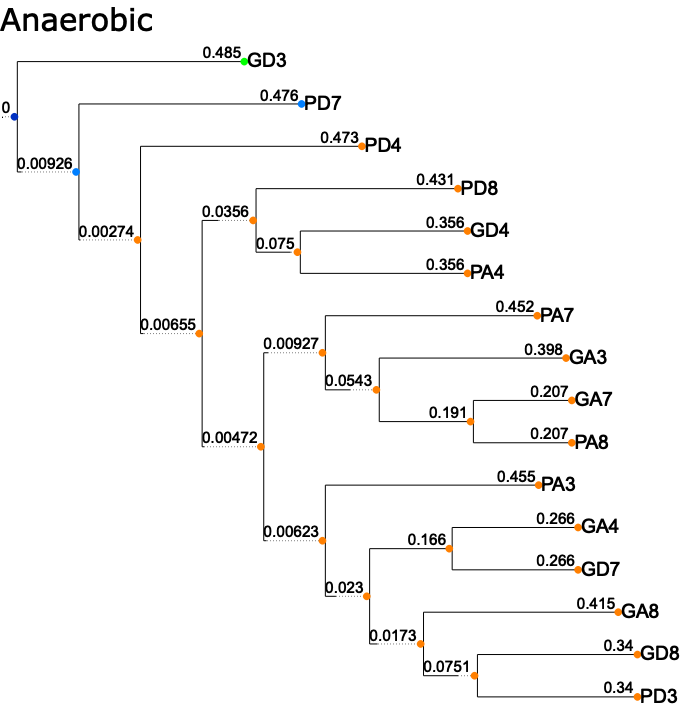

In [98]:
create_cluster_map(df,anaerobic,'Anaerobic')

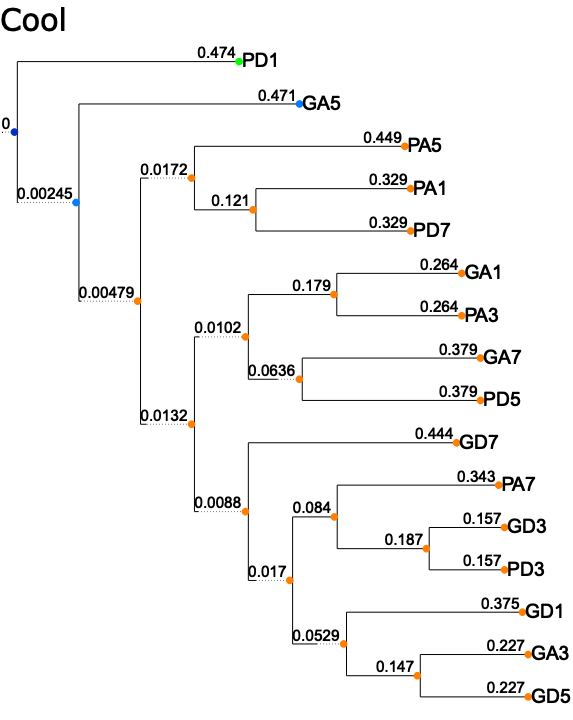

In [99]:
create_cluster_map(df,cool,'Cool')

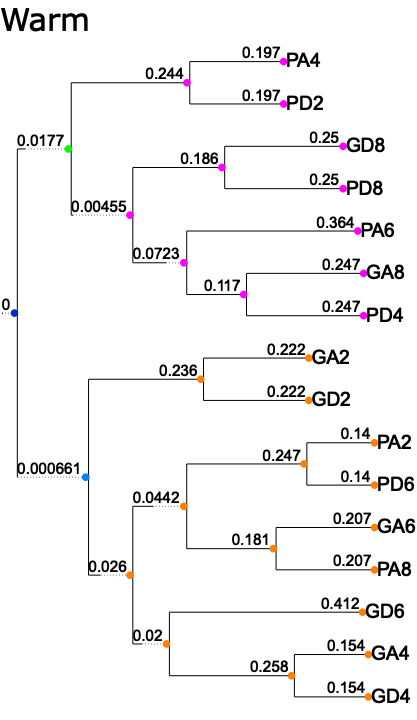

In [100]:
create_cluster_map(df,warm,'Warm')

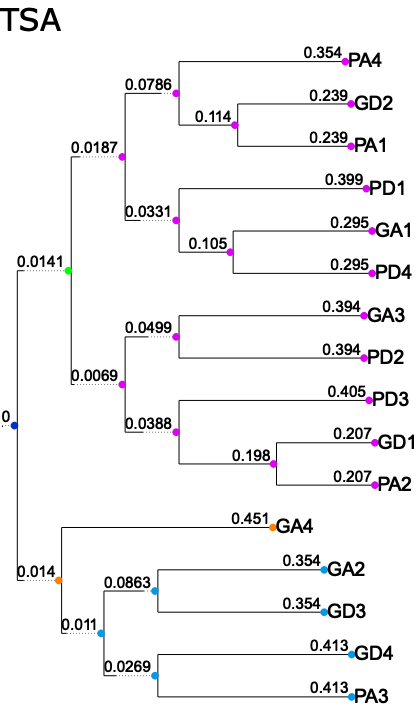

In [101]:
create_cluster_map(df,tsa,'TSA')

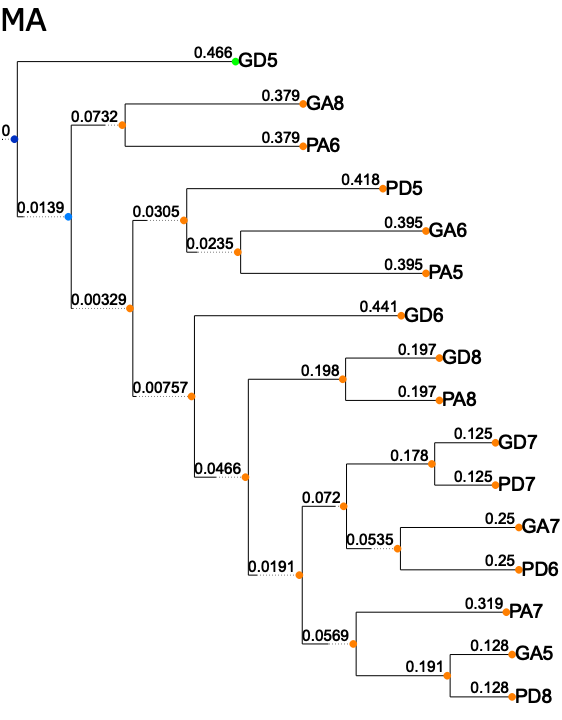

In [102]:
create_cluster_map(df,ma,'MA')

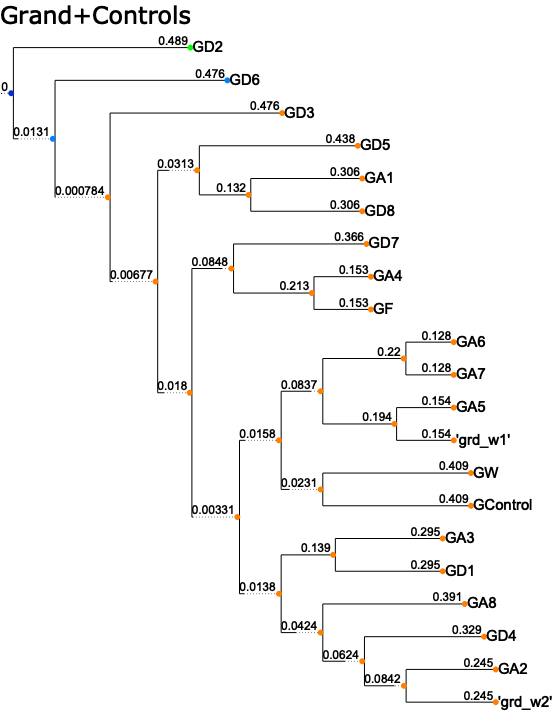

In [111]:
create_cluster_map(df,grand+grandctr+['GF'],'Grand+Controls')

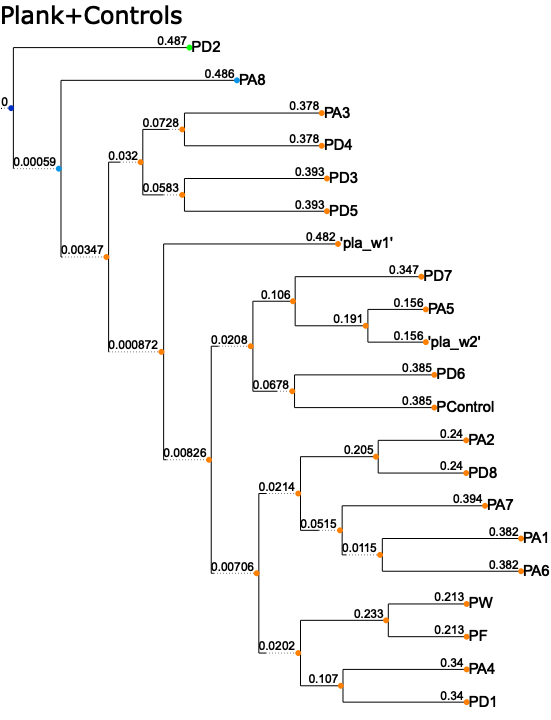

In [110]:
create_cluster_map(df,plank+plankctr+['PF'],'Plank+Controls')

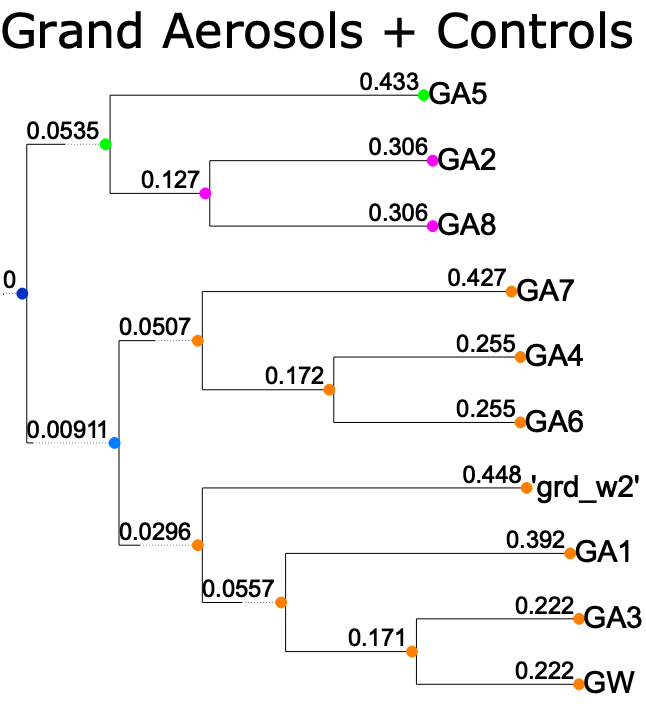

In [105]:
create_cluster_map(df,Grand_Aerosols_Controls,'Grand Aerosols + Controls')

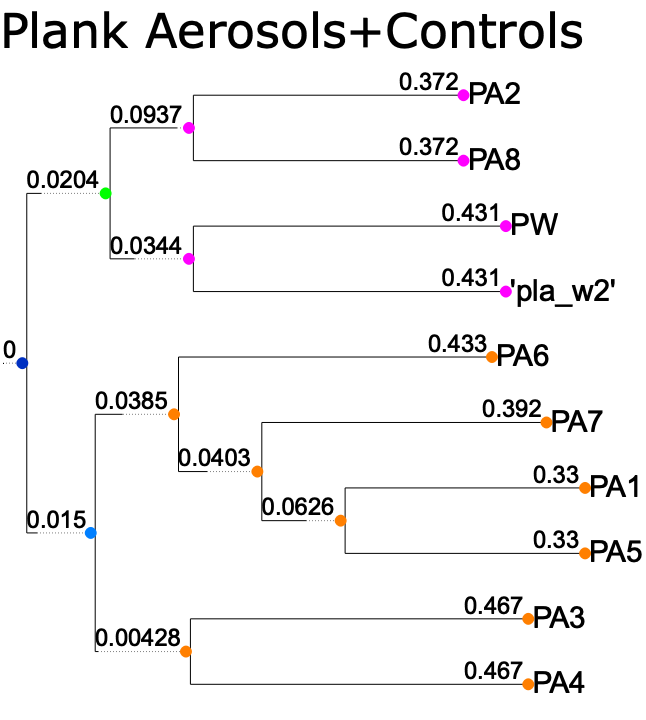

In [106]:
create_cluster_map(df,Plank_Aerosols_Controls,'Plank Aerosols+Controls')

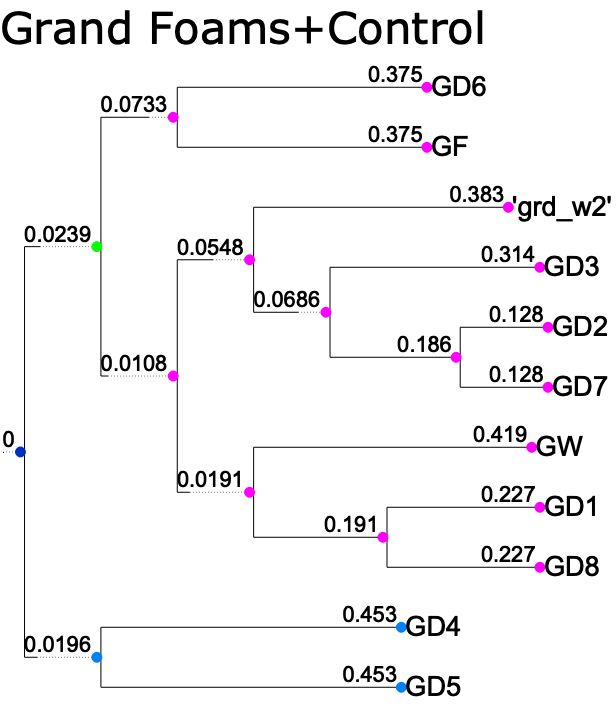

In [107]:
create_cluster_map(df,Grand_Foams_Controls,'Grand Foams+Control')

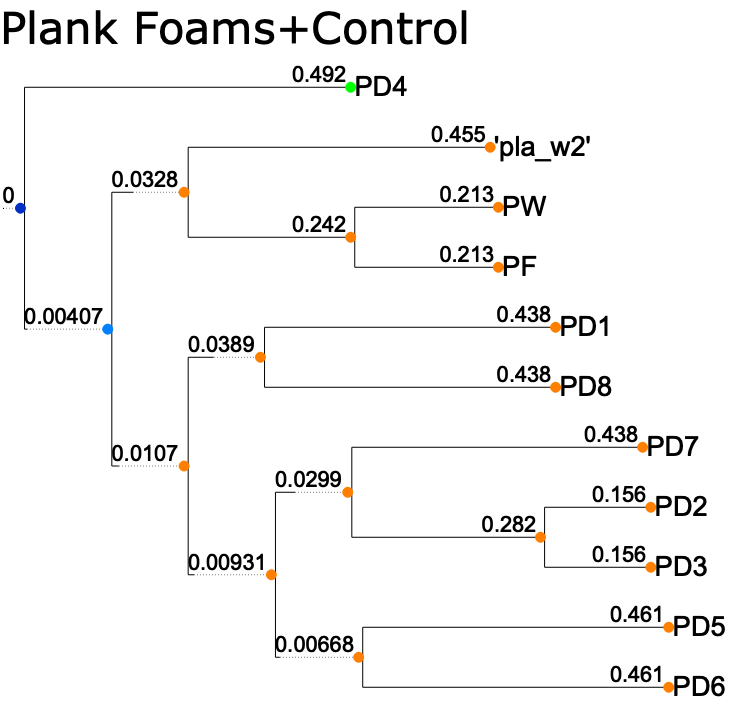

In [108]:
create_cluster_map(df,Plank_Foams_Controls,'Plank Foams+Control')

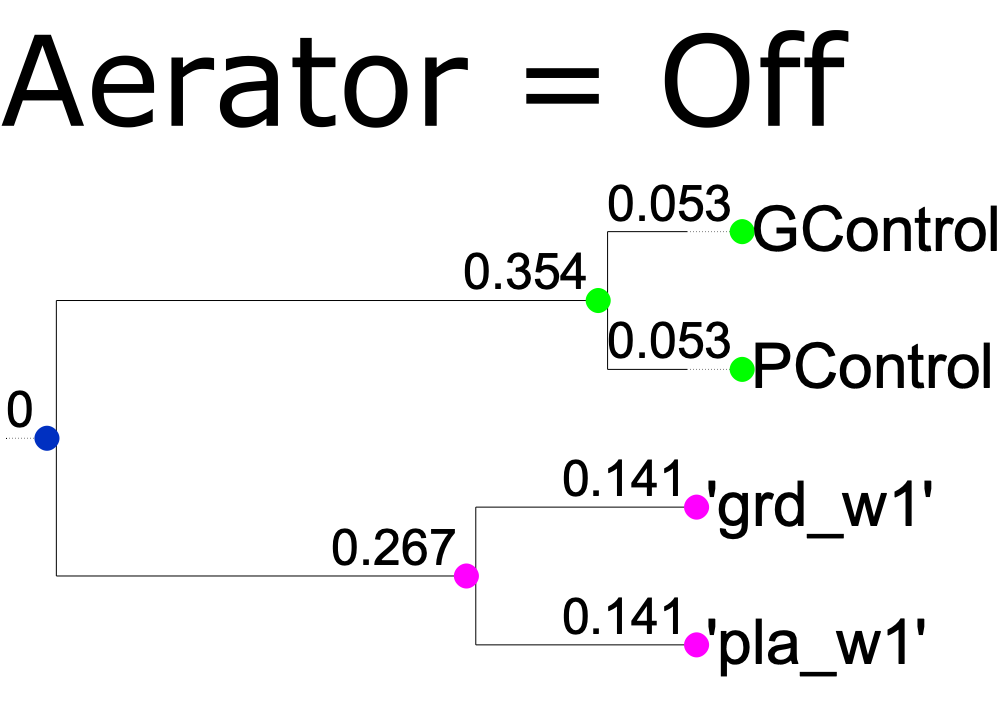

In [51]:
create_cluster_map(df,aeratoroff,'Aerator = Off')

Now here is a function that takes a dataframe (df) that has the format provided, considers a certain number of sample columns in it (ncol), and produces a relative bar graph of a particular taxonomic level (taxa). You must specify the number of unique identified taxa you would like to have represaented in the bar graph (n). All remaining classifications will be assigned either to "unclassified" (if there is no designation provided) or "other" (if there is and the number present in the samples are just too small to be included in n.

In [56]:
def plot_rel_abundances(df,ncol,start,taxa,num):
    columns = df.columns
    labels = columns[start:ncol+start]
    colors = distinctipy.get_colors(num+2)
    unique_things = df[taxa].unique()
    unique_things = unique_things[unique_things != np.array(None)]
    unique_things = unique_things[unique_things != '']
    unique_things = np.append(unique_things, 'Unclassified')

    ysum = np.zeros(ncol)
    yother = np.zeros(ncol)
    y = np.zeros(ncol)
    
    fig = plt.figure()
    ax = plt.subplot(111)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    

    for ind,thing in enumerate(unique_things):
        if ind < num:
            if thing != 'Unclassified':
                for n,label in enumerate(labels):
                    y[n] = sum(df[label][df[taxa] == thing])/sum(df[label])
            else:
                for n, label in enumerate(labels):
                    y[n] = 1.0-ysum[n]
            ax.bar(labels, y, bottom=ysum, color=colors[ind])
            for n, label in enumerate(labels):
                ysum[n] += y[n]
        else:
            unique_things = np.append(unique_things[0:num],['Other','Unclassified'])
            if thing != 'Unclassified':
                for n, label in enumerate(labels):
                    yother[n] += sum(df[label][df[taxa] == thing])/sum(df[label])
                continue
            else:
                for n, label in enumerate(labels):
                    y[n] = yother[n]
                ax.bar(labels, y, bottom=ysum, color=colors[num])
                for n, label in enumerate(labels):
                    ysum[n] += y[n]
                    y[n] = 1.0-ysum[n]
                ax.bar(labels, y, bottom=ysum, color=colors[num+1])
    # plot bars in stack manner
    ax.set_ylabel("Relative")
    # Put a legend to the right of the current axis
    ax.legend(unique_things, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Let's see how that works

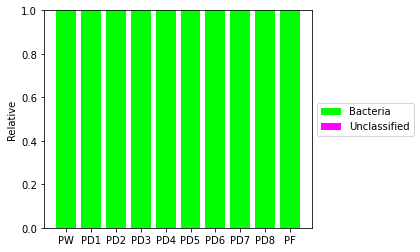

In [52]:
plot_rel_abundances(df,10,27,'Kingdom',100)

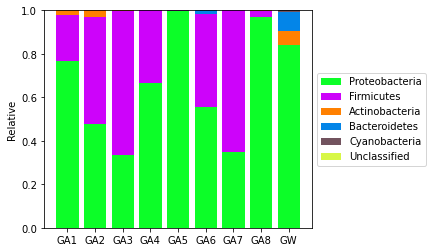

In [54]:
plot_rel_abundances(df,9,1,'Phylum',8)

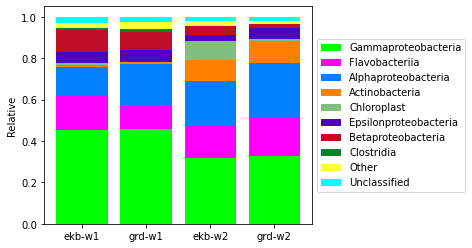

In [16]:
plot_rel_abundances(df,4,'Class',8)

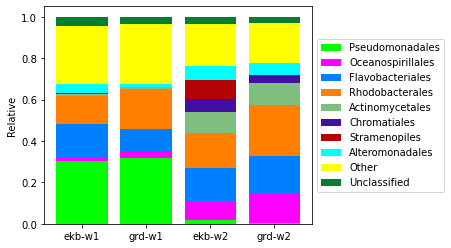

In [17]:
plot_rel_abundances(df,4,'Order',8)

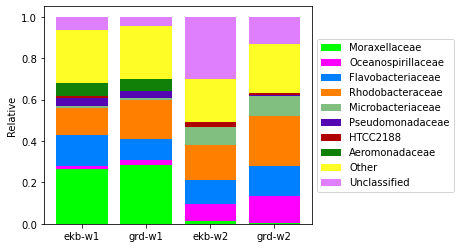

In [18]:
plot_rel_abundances(df,4,'Family',8)

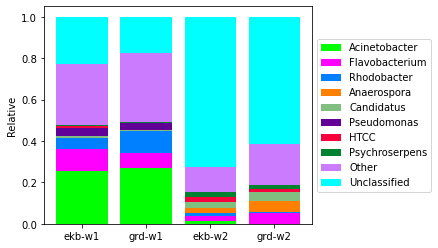

In [19]:
plot_rel_abundances(df,4,'Genus',8)

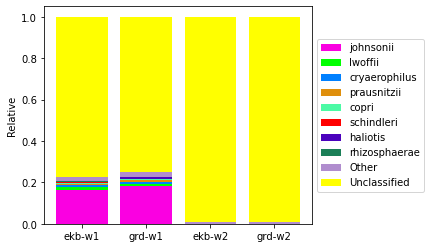

In [20]:
plot_rel_abundances(df,4,'Species',8)

The next step is to produce a function that will plot the Principle Coordinate Analysis using the Skbio package (which can be installed with conda). First a Bray-Curtis Distance Matrix is calculated and then the PCoA eigenvectors and eigenvalues are calculated. The two most significant eigenvalues (labeled PC1 and PC2) are then plotted with the magnitude of each sample's projection onto the coordinate indicated in the scatterplot. More advanced color-coding is possible, but may benefit from application via the UPGMA tree below.

In [57]:
def plot_pcoa(df,ncol):
    from skbio.diversity import beta_diversity
    from skbio.stats.ordination import pcoa
    columns = df.columns
    labels = columns[1:ncol+1]
    data = df[labels]
    data_T = data.T
    ids = list(labels)
    bc_dm = beta_diversity("braycurtis",data_T, ids)
    bc_pc = pcoa(bc_dm)
    xvals = bc_pc.samples['PC1']
    yvals = bc_pc.samples['PC2']
    for ind in range(0,ncol):
        plt.scatter(xvals[ind],yvals[ind],
            label=ids[ind])
    plt.xlabel("PC1 "+str(round(100*bc_pc.proportion_explained[0],2))+' % variance explained')
    plt.ylabel("PC2 "+str(round(100*bc_pc.proportion_explained[1],2))+' % variance explained')
    null = plt.legend()

Let's just look at where the different projected magnitudes are for the dataframe.

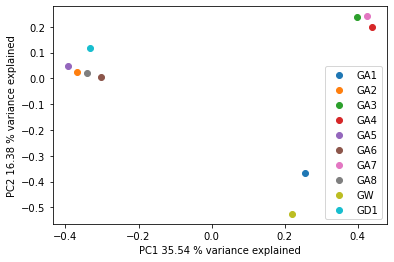

In [59]:
plot_pcoa(df,10)

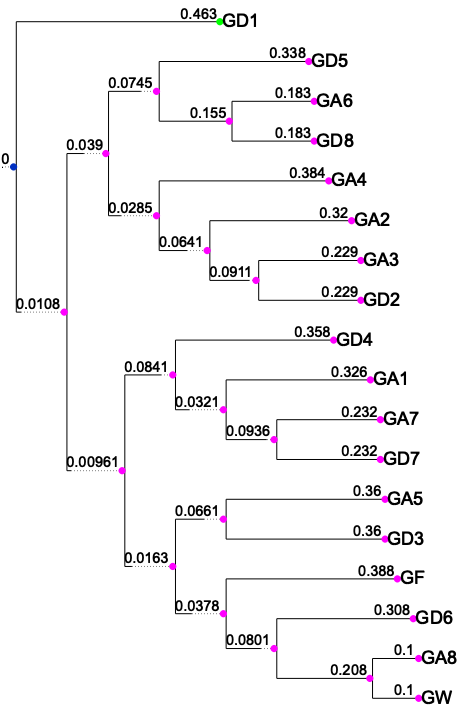

In [96]:
t.render("%%inline", units="in",h=8, tree_style=ts)

In [1]:
from sklearn.decomposition import PCA

In [40]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

calculator = DistanceCalculator('identity')

In [41]:
constructor = DistanceTreeConstructor(calculator, 'upgma')

In [136]:
from ete3 import ClusterTree, TreeStyle, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node

matrix = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7
A\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58
B\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12
C\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36
D\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93
E\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65
F\t-1.04\t-1.11\t0.87\t-0.14\t-0.80\t1.74\t0.48
G\t-1.57\t-1.17\t1.29\t0.23\t-0.20\t1.17\t0.26
H\t-1.53\t-1.25\t0.59\t-0.30\t0.32\t1.41\t0.77
"""
print("Example numerical matrix")
print(matrix)
# #Names  col1    col2    col3    col4    col5    col6    col7
# A       -1.23   -0.81   1.79    0.78    -0.42   -0.69   0.58
# B       -1.76   -0.94   1.16    0.36    0.41    -0.35   1.12
# C       -2.19   0.13    0.65    -0.51   0.52    1.04    0.36
# D       -1.22   -0.98   0.79    -0.76   -0.29   1.54    0.93
# E       -1.47   -0.83   0.85    0.07    -0.81   1.53    0.65
# F       -1.04   -1.11   0.87    -0.14   -0.80   1.74    0.48
# G       -1.57   -1.17   1.29    0.23    -0.20   1.17    0.26
# H       -1.53   -1.25   0.59    -0.30   0.32    1.41    0.77
#
#
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree("(((A,B),(C,(D,E))),(F,(G,H)));", text_array=matrix)
t.show("heatmap")
t.show("cluster_cbars")
t.show("cluster_bars")
t.show("cluster_lines")

Example numerical matrix

#Names	col1	col2	col3	col4	col5	col6	col7
A	-1.23	-0.81	1.79	0.78	-0.42	-0.69	0.58
B	-1.76	-0.94	1.16	0.36	0.41	-0.35	1.12
C	-2.19	0.13	0.65	-0.51	0.52	1.04	0.36
D	-1.22	-0.98	0.79	-0.76	-0.29	1.54	0.93
E	-1.47	-0.83	0.85	0.07	-0.81	1.53	0.65
F	-1.04	-1.11	0.87	-0.14	-0.80	1.74	0.48
G	-1.57	-1.17	1.29	0.23	-0.20	1.17	0.26
H	-1.53	-1.25	0.59	-0.30	0.32	1.41	0.77



In [ ]:
matrix_dist = [i for r in range(len(bc_dm[:,:]))\
               for i in array.matrix[r] if np.isfinite(i)]
matrix_max = np.max(matrix_dist)
matrix_min = no.min(matrix_dist)
matrix_avg = matrix_min+((matrix_max-matrix_min)/2)

# Creates a profile face that will represent node's profile as a
# heatmap
profileFace  = ProfileFace(matrix_max, matrix_min, matrix_avg, \
                                         200, 14, "heatmap")
cbarsFace = ProfileFace(matrix_max,matrix_min,matrix_avg,200,70,"cbars")
nameFace = AttrFace("name", fsize=8)
# Creates my own layout function that uses previous faces
def mylayout(node):
    # If node is a leaf
    if node.is_leaf():
        # And a line profile
        add_face_to_node(profileFace, node, 0, aligned=True)
        node.img_style["size"]=0
        add_face_to_node(nameFace, node, 1, aligned=True)

    # If node is internal
    else:
        # If silhouette is good, creates a green bubble
        if node.silhouette>0:
            validationFace = TextFace("Silh=%0.2f" %node.silhouette,
                                      "Verdana", 10, "#056600")
            node.img_style["fgcolor"]="#056600"
        # Otherwise, use red bubbles
        else:
            validationFace = TextFace("Silh=%0.2f" %node.silhouette,
                                      "Verdana", 10, "#940000")
            node.img_style["fgcolor"]="#940000"

        # Sets node size proportional to the silhouette value.
        node.img_style["shape"]="sphere"
        if node.silhouette<=1 and node.silhouette>=-1:
            node.img_style["size"]= 15+int((abs(node.silhouette)*10)**2)

        # If node is very internal, draw also a bar diagram
        # with the average expression of the partition
        add_face_to_node(validationFace, node, 0)
        if len(node)>100:
            add_face_to_node(cbarsFace, node, 1)

# Use my layout to visualize the tree
ts = TreeStyle()
ts.layout_fn = mylayout
t.show(tree_style=ts)

In [26]:
data = df[['ekb-w1','grd-w1','ekb-w2','grd-w2']]
data_T = data.T
pca = PCA(2)
projected = pca.fit_transform(data_T)
print(data.shape)
print(projected.shape)                                 

(1199, 4)
(4, 2)


In [44]:
from sklearn.preprocessing import scale
 #convert the data into a numpy array
projected = scale(projected);projected

array([[ 0.89306688,  0.02158329],
       [ 1.10022158, -0.08908736],
       [-0.94494998,  1.44607622],
       [-1.04833848, -1.37857215]])

Text(0, 0.5, 'component 2')

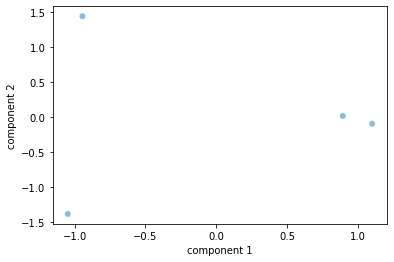

In [45]:
plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [70]:
data_T

,0,1,2,3,4,5,6,7,8,9,...,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198
ekb-w1,8133,85,4215,1872,94,79,25,225,90,815,...,3,0,0,3,0,0,0,0,0,3
grd-w1,9240,4,2843,4210,60,2,0,24,65,565,...,0,3,3,0,3,0,3,3,3,0
ekb-w2,18,3812,487,109,2850,1475,2644,3512,1114,908,...,0,0,0,0,0,0,0,0,0,0
grd-w2,5,5707,1062,172,2803,4036,1358,237,2627,927,...,0,0,0,0,0,3,0,0,0,0


In [100]:
from skbio.diversity import beta_diversity as pw_distances

ids = ['ekb-w1','grd-w1','ekb-w2','grd-w2']
bc_dm = pw_distances("braycurtis",data_T, list('abcd'))
print(bc_dm[:,:])
print(np.linalg.det(bc_dm[:,:]))

[[0.         0.21042923 0.81472152 0.83082752]
 [0.21042923 0.         0.88114884 0.88723818]
 [0.81472152 0.88114884 0.         0.36202793]
 [0.83082752 0.88723818 0.36202793 0.        ]]
-0.21578872682197198


Text(0, 0.5, 'PC2 8.52 % variance explained')

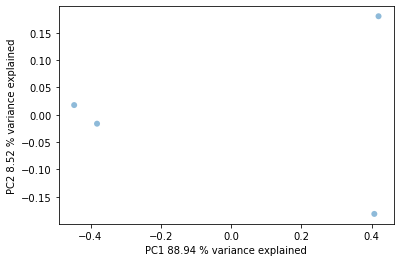

In [148]:
projected_bc = pca.fit_transform(bc_dm[:,:])


plt.scatter(bc_pc.samples['PC1'], bc_pc.samples['PC2'],
            edgecolor='none', alpha=0.5)
plt.xlabel("PC1 "+str(round(100*bc_pc.proportion_explained[0],2))+' % variance explained')
plt.ylabel("PC2 "+str(round(100*bc_pc.proportion_explained[1],2))+' % variance explained')

In [131]:
str(round(100*bc_pc.proportion_explained[0],2))

'88.94'

In [111]:
from skbio.stats.ordination import pcoa
bc_pc = pcoa(bc_dm)

print(bc_pc.proportion_explained)

PC1    0.889370
PC2    0.085185
PC3    0.025445
PC4    0.000000
dtype: float64


In [120]:
print(bc_pc.eigvals[0])

0.6877062619803165


In [147]:
bc_pc.samples['PC1'], bc_pc.samples['PC2']

(a   -0.381427
 b   -0.446532
 c    0.407985
 d    0.419973
 Name: PC1, dtype: float64,
 a   -0.016380
 b    0.017657
 c   -0.181317
 d    0.180039
 Name: PC2, dtype: float64)

In [61]:
from scipy.spatial import distance

array0 = data['ekb-w1']
array1 = data['grd-w1']

print(distance.braycurtis(array0,array1))

0.21042922881624881


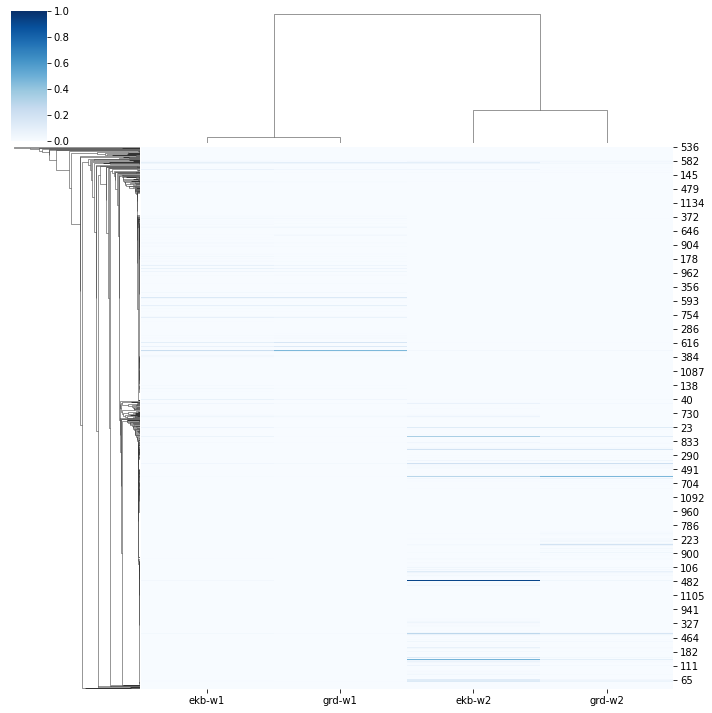

In [136]:
import seaborn as sns

sns.clustermap(df[['ekb-w1','grd-w1','ekb-w2','grd-w2']], metric="correlation", method="single", cmap="Blues", standard_scale=1)